In [321]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
import numpy as np
from collections import Counter
import pandas as pd

In [383]:
iris = load_iris()
X, y = iris.data, iris.target
labels = set(y)

In [384]:
# bucketing features 
feature_pairs
for idx in range(X.shape[1]):
    feat_ = (X[:,idx])
    bucket = np.histogram(feat_)[1]
    feature_pairs.append((bucket,feat_))

In [385]:
# Calculating total entropy
probs = [x[1]/len(y) for x in Counter(y).items()]
log_probs = -np.log2(probs)
total_entropy = np.sum(probs*log_probs)

In [386]:
# For each value of the feature, find its likelihood given each label
gains = []
for fs,feature_ in feature_pairs : 
    f_counts = []
    for idx in range(len(fs)-1):
        # indicies for a feature falling in a range
        indicies =  (feature_>fs[idx]) * (feature_<=fs[idx+1])
        # classes at those indicies 
        classes = y[indicies]
        # count of the feature in the range given a class
        counts = []
        for l in labels:
            counts.append(np.sum(classes == l))
        f_counts.append(counts)
    f_matrix = np.array(f_counts) # feature count for labels , num_feats x num_labels 
    
    sums = np.sum(f_matrix,axis=1) # sum over features , total features per class
    sums = np.clip(sums, 1, np.max(sums), out=sums)[None,].T# clipping 0 to 1 for division
    probs = f_matrix/sums # calculate probability of each feature given the class, sum over all labels (cols) should be 1
    log_probs = -np.log2(probs, where=0<probs, out=0*probs) # log prob
    
    feat_prior = np.sum(f_matrix,axis=1)/len(y)
    
    cross_entropy = feat_prior *np.sum(log_probs*probs,axis=1)# entropy of the feature 
    
    gains.append(total_entropy-np.sum(cross_entropy)) # information gain of the feature
    
    

In [391]:
root_node = np.argmax(gains) # index of the feature for the root node

In [433]:
# picking feature 3 as the root decider
top_index = X[:,3] > np.median(X[:,3])
bot_index = X[:,3] <= np.median(X[:,3])
leaf_right = y[top_index]
leaf_left  = y[bot_index]

# another way to split the data is using the gini index , the smaller gini index would tell us which feature to use 
# 1 - prob(class_1)^2 - prob(class_2)^2 - prob(class_3)^2
# counting the labels in each leaf 
count_right = []
count_left = []

for l in labels:
    count_right.append(np.sum(leaf_right==l))
    count_left.append(np.sum(leaf_left==l))

gini_right = 1 - np.sum(np.power(count_right/np.sum(count_right),2))
gini_left  = 1 - np.sum(np.power(count_left/np.sum(count_left),2))
weighted_gini = np.sum(np.array(count_right)/len(y) * gini_right + np.array(count_left)/len(y) * gini_left)

In [435]:
weighted_gini

0.44301994301994296

In [ ]:
class DecisionTree():
    def __init__(self, x ,y):
    
    

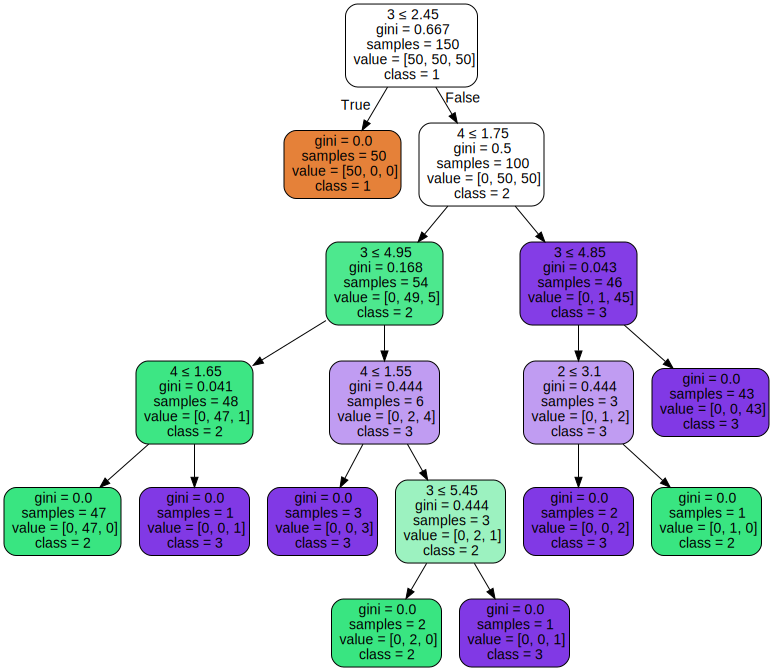

In [29]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['1','2','3','4'],  
                      class_names=['1','2','3'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph